In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [2]:
from bandit import GreedyEpsAgent, ConstantStepSizeGreedyEpsAgent, WeightedUCBAgent, WeightedGradientBanditAgent, WeightedThompsonSamplingAgent

# Test Action Values

In [3]:
# Test the action values
k = 10
t = 10000
bandit = GreedyEpsAgent(k=k, stationary=False)
reward_matrix = bandit.test_action_values(t)

Text(0, 0.5, 'Reward')

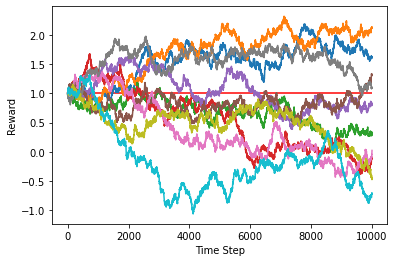

In [4]:
plt.plot(reward_matrix);
plt.hlines(bandit.action_values[0], 0, t, colors="r")
plt.xlabel("Time Step")
plt.ylabel("Reward")

# Parametric Study settings

In [5]:
# Define the run steps (how many steps per run) and the number of independent runs (for averaging purposes)
run_steps = 100000
n_runs = 1000

## Greedy-Epsilon

In [6]:
# Define parameter grid and bandits
param_grid = np.arange(-18,3, 3, dtype=float)
bandits = [GreedyEpsAgent(k=k, eps=2**p, stationary=False) for p in param_grid]


In [7]:
# Initialize reward variable
greedy_eps_avg_reward = np.zeros(shape=(len(param_grid), 2))
greedy_eps_avg_reward[:, 0] = param_grid

# Perform training
for i, bandit in enumerate(bandits):
    for run in tqdm(range(n_runs)):
        bandit.reset()
        _, _, _ = bandit.train(run_steps)
        _, rewards, _ = bandit.train(run_steps)
        greedy_eps_avg_reward[i, 1] += (1/n_runs)*rewards.mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

## Greedy-Epsilon, Constant Step-Size Parameter

In [8]:
# Define parameter grid and bandits
param_grid = np.arange(-13, 1, 2, dtype=float)
bandits = [ConstantStepSizeGreedyEpsAgent(k=k, eps=2**p, alpha=0.1, stationary=False) for p in param_grid]

In [9]:
# Initialize reward variable
greedy_eps_conststep_avg_reward = np.zeros(shape=(len(param_grid), 2))
greedy_eps_conststep_avg_reward[:, 0] = param_grid

# Perform training
for i, bandit in enumerate(bandits):
    for run in tqdm(range(n_runs)):
        bandit.reset()
        _, _, _ = bandit.train(run_steps)
        _, rewards, _ = bandit.train(run_steps)
        greedy_eps_conststep_avg_reward[i, 1] += (1/n_runs)*rewards.mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

## UCB

In [10]:
# Define parameter grid and bandits
param_grid = np.arange(-18, 6, 4, dtype=float)
bandits = [WeightedUCBAgent(k=k, c=2**p, stationary=False) for p in param_grid]

In [11]:
# Initialize reward variable
ucb_avg_reward = np.zeros(shape=(len(param_grid), 2))
ucb_avg_reward[:, 0] = param_grid

# Perform training
for i, bandit in enumerate(bandits):
    for run in tqdm(range(n_runs)):
        bandit.reset()
        _, _, _ = bandit.train(run_steps)
        _, rewards, _ = bandit.train(run_steps)
        ucb_avg_reward[i, 1] += (1/n_runs)*rewards.mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

## Gradient Bandit

In [12]:
n_runs = 500

In [13]:
# Define parameter grid and bandits
param_grid = np.arange(-18, 3, 3, dtype=float)
bandits = [WeightedGradientBanditAgent(k=k, alpha=2**p, weight=0.1, stationary=False) for p in param_grid]

In [14]:
# Initialize reward variable
gba_avg_reward = np.zeros(shape=(len(param_grid), 2))
gba_avg_reward[:, 0] = param_grid

# Perform training
for i, bandit in enumerate(bandits):
    for run in tqdm(range(n_runs)):
        bandit.reset()
        _, _, _ = bandit.train(run_steps)
        _, rewards, _ = bandit.train(run_steps)
        gba_avg_reward[i, 1] += (1/n_runs)*rewards.mean()

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

## Thompson Sampling

In [15]:
n_runs = 500

In [19]:
# Define parameter grid and bandits
param_grid = np.arange(-16, -2, 2, dtype=float)
bandits = [WeightedThompsonSamplingAgent(k=k, gamma=2**p, stationary=False) for p in param_grid]

In [20]:
# Initialize reward variable
ths_avg_reward = np.zeros(shape=(len(param_grid), 2))
ths_avg_reward[:, 0] = param_grid

# Perform training
for i, bandit in enumerate(bandits):
    for run in tqdm(range(n_runs)):
        bandit.reset()
        _, _, _ = bandit.train(run_steps)
        _, rewards, _ = bandit.train(run_steps)
        ths_avg_reward[i, 1] += (1/n_runs)*rewards.mean()

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

# Plotting

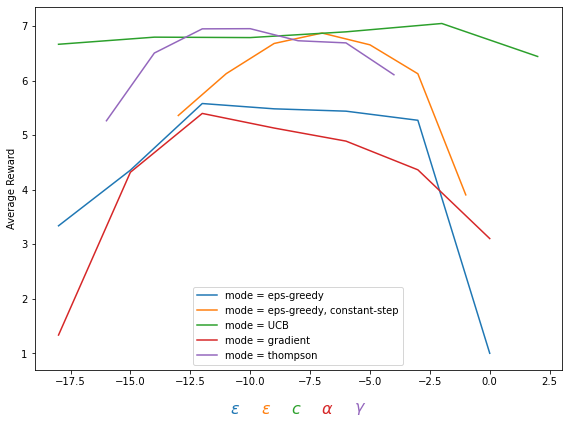

In [21]:
import matplotlib
matplotlib.rcParams["text.usetex"]
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from utils import multicolor_label

mode_list = ['eps-greedy', 'eps-greedy, constant-step', 'UCB', 'gradient', 'thompson']
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(8,6));


plot_labels = [f'mode = {mode}' for mode in mode_list]
axs.plot(greedy_eps_avg_reward[:, 0], greedy_eps_avg_reward[:, 1])
axs.plot(greedy_eps_conststep_avg_reward[:, 0], greedy_eps_conststep_avg_reward[:, 1])
axs.plot(ucb_avg_reward[:, 0], ucb_avg_reward[:, 1])
axs.plot(gba_avg_reward[:, 0], gba_avg_reward[:, 1])
axs.plot(ths_avg_reward[:, 0], ths_avg_reward[:, 1])


multicolor_label(axs,[r'$\epsilon$',r'$\epsilon$', r'$c$', r'$\alpha$', r'$\gamma$'],[x.get_color() for x in axs.lines], axis='x', size=16)
axs.set_ylabel('Average Reward')
axs.legend(labels=plot_labels,)

plt.tight_layout()
fig.savefig('exercise_2_11.png', dpi=600)